### Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

In [3]:
#reading training and validation data and its labels
train_data = pd.read_csv(parent_directory + '/Data/training_data.csv')
val_data = pd.read_csv(parent_directory + '/Data/validation_data.csv')
test_data = pd.read_csv(parent_directory + '/Data/testing_data.csv')

In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,2,0,15,123,126,76,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,167,168,26,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.shape

(45000, 785)

In [6]:
val_data.shape

(15000, 785)

In [7]:
test_data.shape

(10000, 785)

In [8]:

# Checking label distribution in the training data
train_label_counts = train_data['label'].value_counts().sort_index()
print("Training Data Label Distribution:")
print(train_label_counts)

# Checking label distribution in the validation data
val_label_counts = val_data['label'].value_counts().sort_index()
print("\nValidation Data Label Distribution:")
print(val_label_counts)

# Checking label distribution in the testing data
test_label_counts = test_data['label'].value_counts().sort_index()
print("\nTesting Data Label Distribution:")
print(test_label_counts)


Training Data Label Distribution:
0    4525
1    4548
2    4470
3    4483
4    4477
5    4577
6    4491
7    4496
8    4473
9    4460
Name: label, dtype: int64

Validation Data Label Distribution:
0    1475
1    1452
2    1530
3    1517
4    1523
5    1423
6    1509
7    1504
8    1527
9    1540
Name: label, dtype: int64

Testing Data Label Distribution:
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: label, dtype: int64


Class Distribution:
5    4577
1    4548
0    4525
7    4496
6    4491
3    4483
4    4477
8    4473
2    4470
9    4460
Name: label, dtype: int64


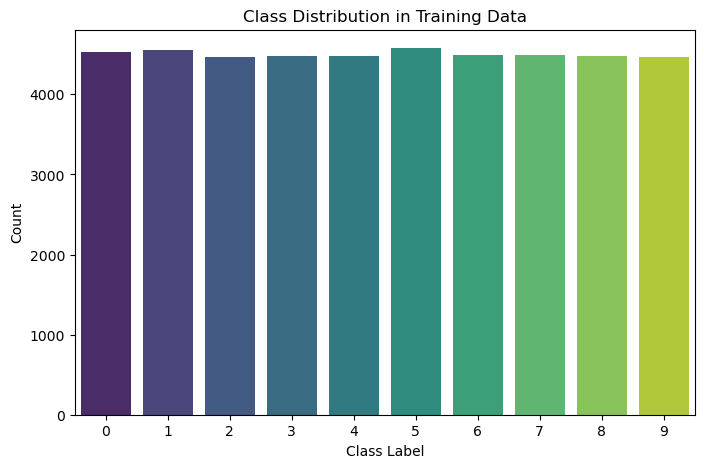

In [9]:
# Class distribution
class_distribution = train_data['label'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Ploting class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=train_data, palette='viridis')
plt.title('Class Distribution in Training Data')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

In [10]:
# Data statistics
data_statistics = train_data.describe()
print("\nData Statistics:")
print(data_statistics)




Data Statistics:
              label        pixel1        pixel2        pixel3        pixel4  \
count  45000.000000  45000.000000  45000.000000  45000.000000  45000.000000   
mean       4.490489      0.000911      0.006222      0.033867      0.104467   
std        2.871121      0.102953      0.252908      1.257882      2.546703   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.000000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     34.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  45000.000000  45000.000000  45000.000000  45000.000000  45000.000000   
mean       0.245733      0.411067      0.812622      2.218200      5.747444   
std        4.385628      5.950256

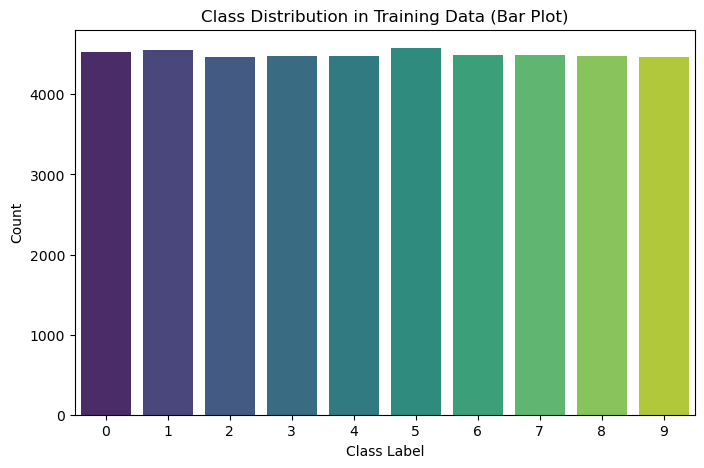

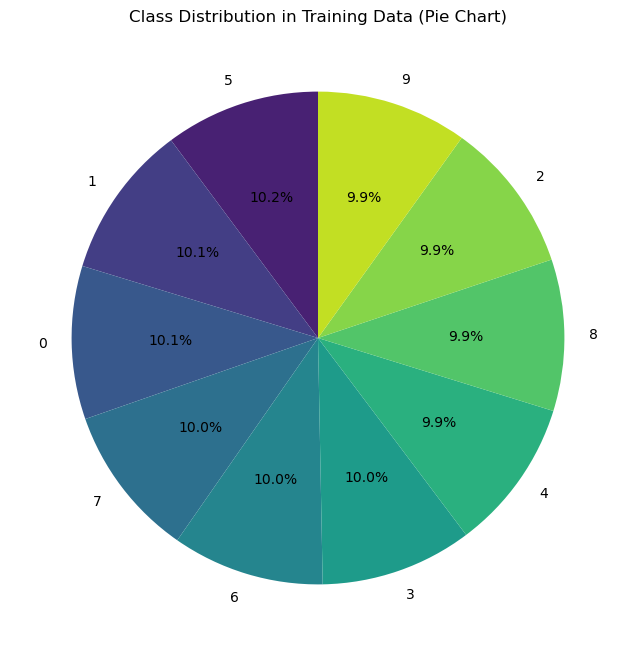

In [11]:

# Load the training data
train_data = pd.read_csv(parent_directory + '/Data/training_data.csv')

# Visualizing Class Distribution using a Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=train_data, palette='viridis')
plt.title('Class Distribution in Training Data (Bar Plot)')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.savefig('class_distribution_bar_plot.png')  # Save the bar plot
plt.show()

# Visualizing Class Distribution using a Pie Chart
class_counts = train_data['label'].value_counts()
labels = class_counts.index
sizes = class_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('viridis', 10), startangle=90)
plt.title('Class Distribution in Training Data (Pie Chart)')
plt.savefig('class_distribution_pie_chart.png')  
plt.show()


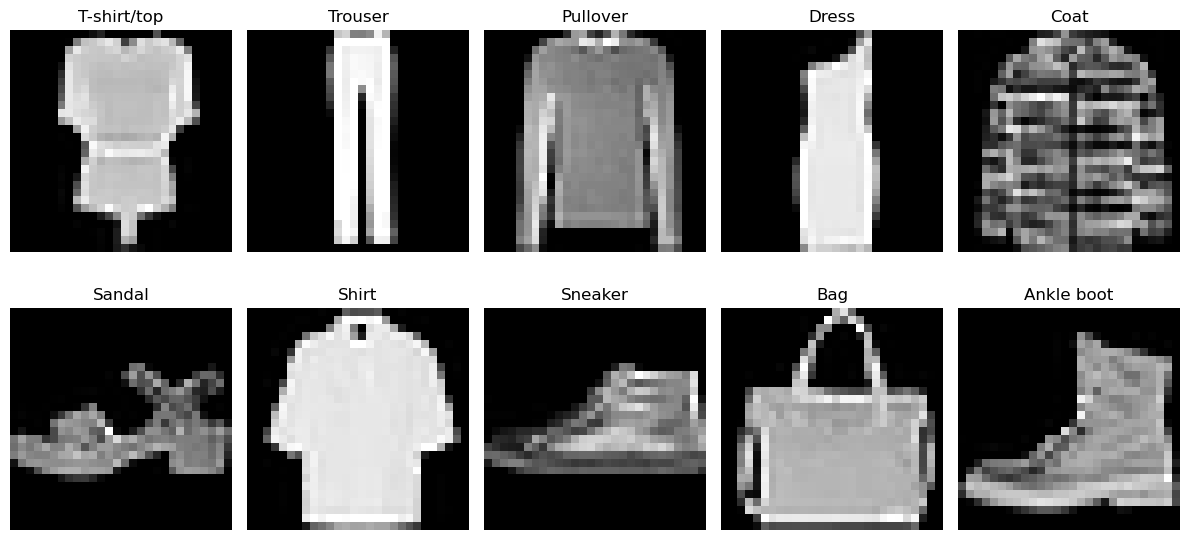

In [12]:

# Displaying a few sample images from each class
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

axes = axes.flatten()

for i, ax in enumerate(axes):
    
    class_label = class_labels[i]
    class_samples = train_data.loc[train_data['label'] == i].iloc[0, 1:].values.reshape(28, 28)
    ax.imshow(class_samples, cmap='gray')
    ax.set_title(class_label)
    ax.axis('off')

plt.tight_layout()
plt.savefig('sample_images.png')
plt.show()


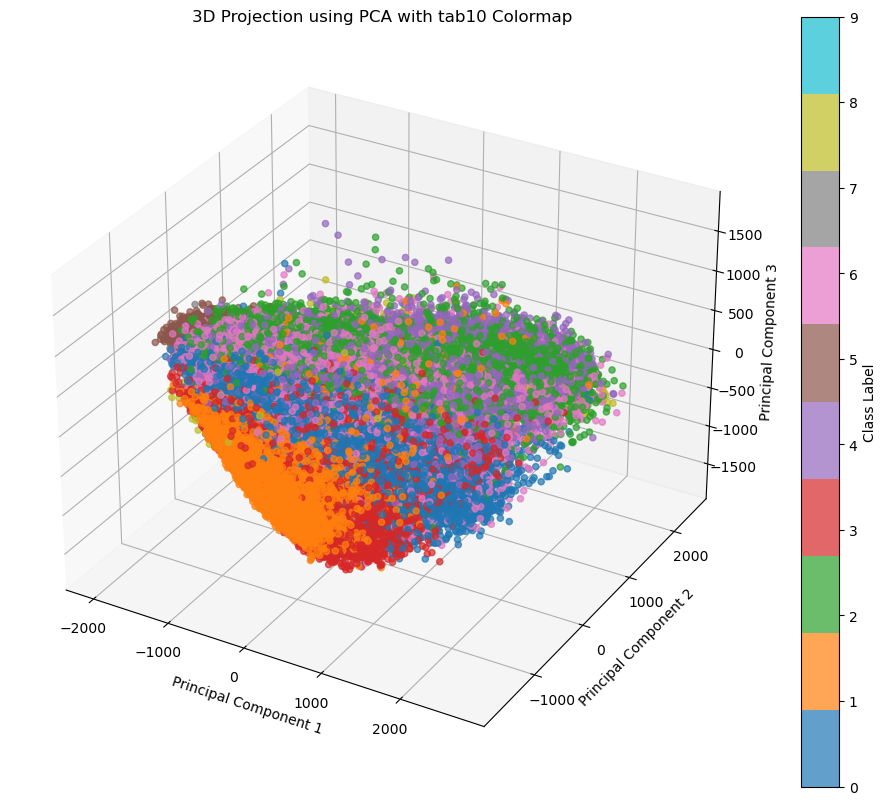

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Dimensionality reduction using PCA in 3 dimensions
X_train = train_data.iloc[:, 1:]
y_train = train_data['label']

# Performing PCA
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train)

# Ploting 3D Projection using PCA with 'tab10' colormap
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca_3d[:, 0],
    X_train_pca_3d[:, 1],
    X_train_pca_3d[:, 2],
    c=y_train,
    cmap='tab10',
    alpha=0.7
)

ax.set_title('3D Projection using PCA with tab10 Colormap')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

colorbar = plt.colorbar(scatter, ticks=range(10))
colorbar.set_label('Class Label')

plt.savefig('pca_3d_projection_tab10.png')  # Save the 3D PCA projection plot with tab10 colormap
plt.show()


Explained Variance Ratio: [0.29104867 0.17729784 0.0598357 ]


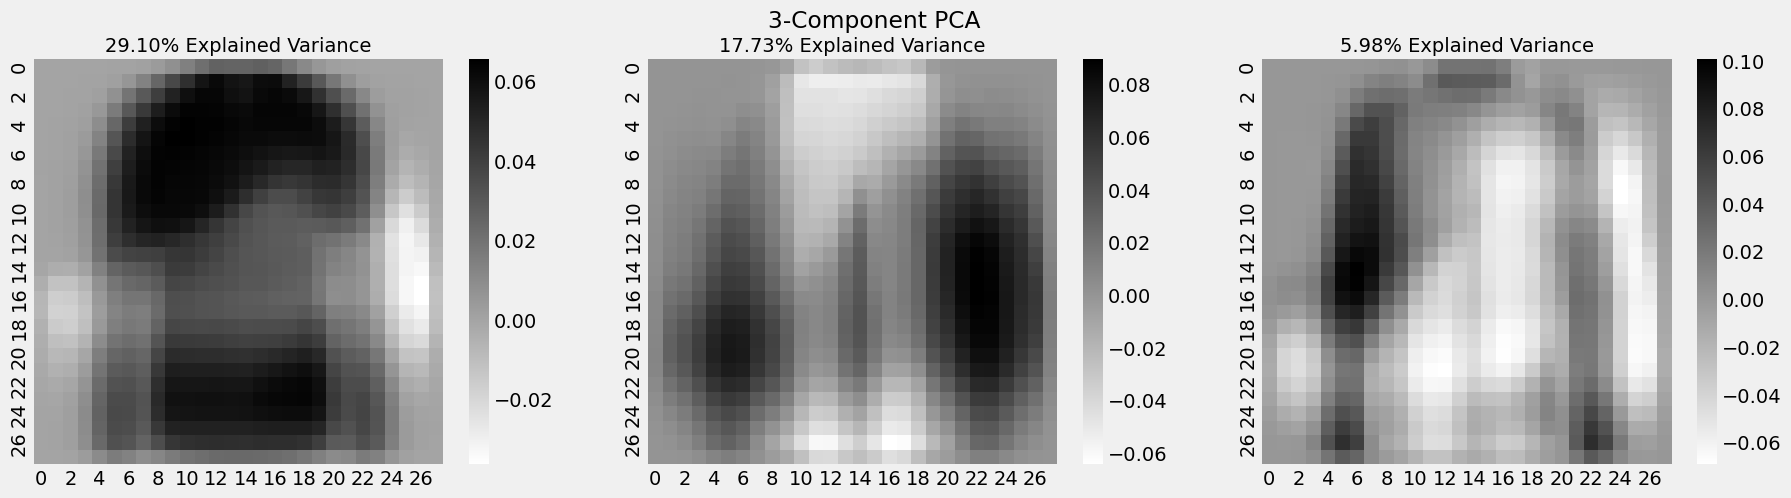

In [14]:
# Calculating the explained variance ratio
explained_variance_ratio = pca_3d.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

# Appending the three-dimensional PCA values as columns to the train_data dataframe
train_data['First Dimension'] = X_train_pca_3d[:, 0]
train_data['Second Dimension'] = X_train_pca_3d[:, 1]
train_data['Third Dimension'] = X_train_pca_3d[:, 2]

plt.style.use('fivethirtyeight')

# Ploting the heatmaps for the first three PCA components
fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(pca_3d.components_[0, :].reshape(28, 28), ax=axarr[0], cmap=plt.cm.binary)
sns.heatmap(pca_3d.components_[1, :].reshape(28, 28), ax=axarr[1], cmap=plt.cm.binary)
sns.heatmap(pca_3d.components_[2, :].reshape(28, 28), ax=axarr[2], cmap=plt.cm.binary)

axarr[0].set_title("{0:.2f}% Explained Variance".format(explained_variance_ratio[0]*100), fontsize=14)
axarr[1].set_title("{0:.2f}% Explained Variance".format(explained_variance_ratio[1]*100), fontsize=14)
axarr[2].set_title("{0:.2f}% Explained Variance".format(explained_variance_ratio[2]*100), fontsize=14)

plt.suptitle('3-Component PCA')

plt.savefig('pca_heatmaps.png')  # Save the heatmap plots
plt.show()


In this part of the analysis, we're looking at the results of Principal Component Analysis (PCA) on our fashion dataset. First, we figure out how much of the original information is captured by each of the three main dimensions in PCA. Then, we add these new three-dimensional values back into our dataset. The interesting part comes next, where we create heatmaps. These visualizations show us which pixels are most influential in each of the three dimensions, giving us an idea of what aspects of the clothing images matter the most in our reduced representation. The titles of these heatmaps tell us the percentage of information retained in each dimension. It's like peeking into the inner workings of our data reduction process and understanding what features stand out the most. This helps us see the key characteristics that make up our fashion dataset in a more simplified form.

The "Explained Variance Ratio" is a critical metric obtained from Principal Component Analysis (PCA), offering insights into the significance of each principal component in capturing the variance within the dataset. In our results, the values [0.291, 0.177, 0.060, 0.050] represent the proportion of total variance explained by the first four principal components, respectively. These values indicate that the first component accounts for approximately 29.1% of the overall variance, the second component contributes 17.7%, and so forth. Higher values signify a greater ability of the respective principal component to retain information from the original dataset. This information aids in understanding the dimensionality reduction achieved by PCA and guides decisions on the number of components to retain for optimal representation of the data.

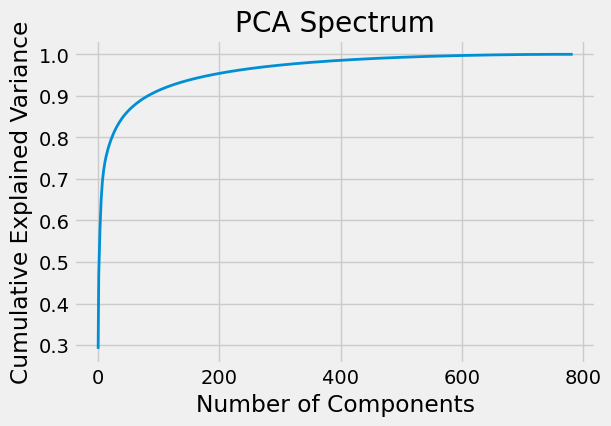

In [15]:
from sklearn.decomposition import PCA

pca_full = PCA(n_components=784)
pca_784 = pca_full.fit_transform(X_train)

# Calculating the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(6, 4))
plt.plot(cumulative_explained_variance_ratio, linewidth=2)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Spectrum")
plt.grid(True)
plt.savefig('pca_spectrum.png')  
plt.show()

PCA Spectrum Analysis

The PCA Spectrum analysis was conducted to determine the optimal number of principal components needed to retain a significant portion of the original dataset's variance. Principal Component Analysis (PCA) was applied to the training data with 784 components, representing the original dimensions. The cumulative explained variance ratio was then computed to visualize the proportion of variance retained as the number of components increased. The resulting PCA Spectrum plot aids in identifying a suitable trade-off between dimensionality reduction and preserving dataset information. This analysis informs decisions on the number of components to retain for subsequent modeling, ensuring an efficient representation of the data while minimizing information loss.

From the graph above, we see that 200 components explain approximately 95% variance and 80 components explain 90% variance. As the number of components increase, the explained variance rises to 100%, which makes sense because it is original matrix with 784 dimensions.

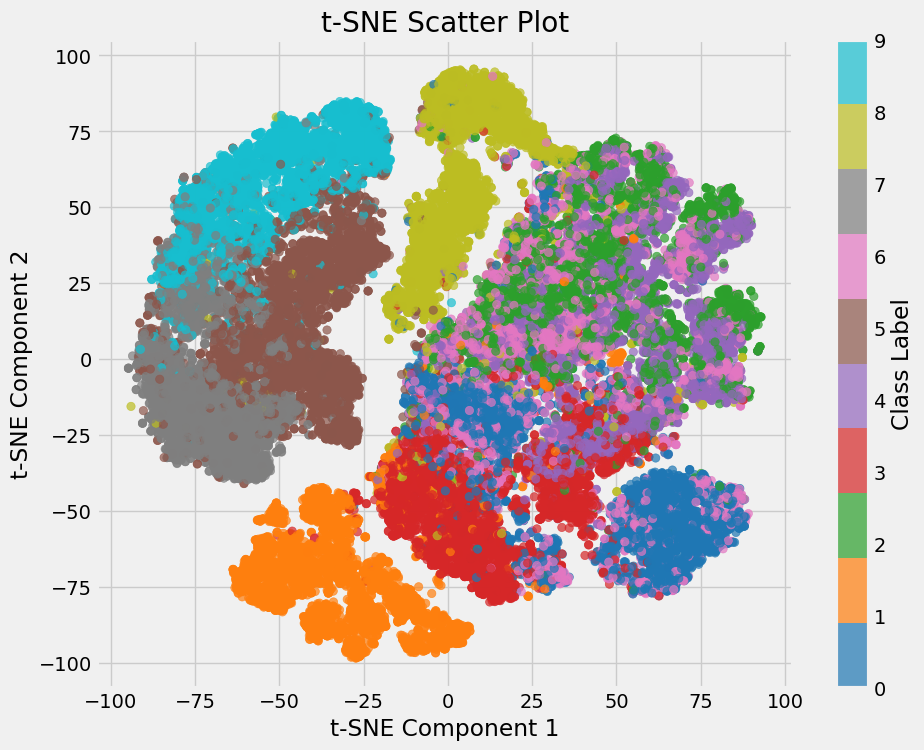

In [16]:
from sklearn.manifold import TSNE

# Assuming train_data is your DataFrame
# Extracting features and labels
X_train = train_data.iloc[:, 1:]
y_train = train_data['label']

# Performing t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Ploting the t-SNE scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_train_tsne[:, 0],
    X_train_tsne[:, 1],
    c=y_train,
    cmap='tab10',
    alpha=0.7
)

plt.title('t-SNE Scatter Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
colorbar = plt.colorbar(scatter, ticks=range(10))
colorbar.set_label('Class Label')
plt.savefig('t-SNE scatter plot.png')
plt.show()



t-SNE Scatter Plot Analysis

In this analysis, t-Distributed Stochastic Neighbouring Entities (t-SNE) was applied to the training dataset to visualize high-dimensional data in a two-dimensional space. The dataset features, representing fashion items, were reduced to two components using t-SNE, preserving the pairwise similarities between instances. The resulting scatter plot illustrates the distribution of fashion classes in a reduced-dimensional space, where each point represents an instance colored according to its class label. t-SNE is particularly useful for revealing the inherent structure and relationships within complex datasets, offering insights into potential clusters or patterns that might be challenging to discern in the original high-dimensional space.